# **TÉCNICAS DE MONTECARLO**

Máster en Tratamiento Estadístico-Computacional de la Información - 2023/2024

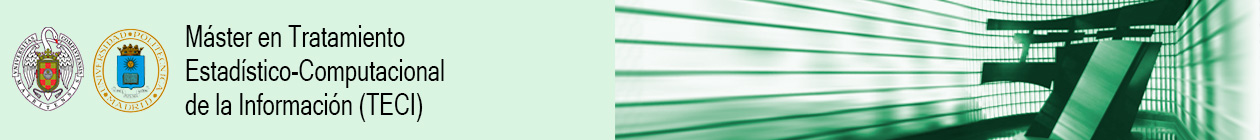

Andrés Herencia López-Menchero

## **Generación de variables aleatorias**

## Introducción

La simulación estadística o simulación de Monte Carlo abarca una colección de
técnicas estadísticas que permiten dar soluciones a problemas matemáticos o
físicos por medio de pruebas aleatorias repetidas. Dichas técnicas están así
basadas en el muestreo sistemático de variables aleatorias.
Estas simulaciones juegan un papel determinante en el cálculo de series (caso
discreto) y en la aproximación de integrales y cálculo de áreas (caso continuo).

Ejemplo: Supóngase que se quiere calcular $\int_a^b g(x) dx$ con $g$ acotada en $(a,b)$.

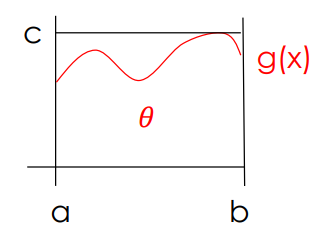

#### Método de acertar y fallar

- Se construye el rectángulo más pequeño que contenga dicha área.
- Se simulan $n$ pares $(x,y)$ uniformes dentro de dicho rectángulo.
- Se calcula cuántos de ellos caen por debajo de la curva, $R$.
$$R \sim B\left(n, p=\frac{\theta}{c\times(b-a)}\right)$$
donde $B$ es una distribución Binomial y $p$ es la proporción de aciertos.
- La proporción obtenida es multiplicada por el ára del rectángulo, $c\times (b-a)$.

El estimador Montecarlo de acertar o fallar es $\tilde{\theta} = c(b-a)\frac{R}{n}$.

**Ejercicio**: Calcular el área de un círculo centrado en el origen y de radio 1.


In [ ]:
# el área de un circulo es x^2 + y^2 = r^2. Si r = 1, entonces x^2 + y^2 = 1.
import random
import numpy as np

def circle_area_monte_carlo(n=1e6):
    """
    Estimate the area of a unit circle using the Monte Carlo method.

    Parameters:
    - n (int): The number of random points to generate for the estimation.
    Default is 1e6.

    Returns:
    float: Estimated area of the unit circle.

    Note: Increasing the value of 'n' generally improves the accuracy of the
    estimation.
    """
    inside_circle = 0
    for _ in range(n):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        # Verify if the point (x,y) is inside the circle.
        if x**2 + y**2 <= 1:
            inside_circle += 1

    est_circle_area = inside_circle / n
    est_square_area = 4
    est_area = est_square_area * est_circle_area

    return est_area

num_puntos = [1e0,1e1,1e2,1e3,1e4,1e5,1e6]
for n in num_puntos:
    est_area = circle_area_monte_carlo(int(n))
    print(f"Área estimada del círculo: {est_area} con {int(n)} puntos")

Área estimada del círculo: 4.0 con 1 puntos
Área estimada del círculo: 2.8 con 10 puntos
Área estimada del círculo: 3.16 con 100 puntos
Área estimada del círculo: 3.188 con 1000 puntos
Área estimada del círculo: 3.1184 con 10000 puntos
Área estimada del círculo: 3.14108 con 100000 puntos
Área estimada del círculo: 3.141704 con 1000000 puntos


Haciendolo con una binomial

In [ ]:
def circle_area_montecarlo(n=1e6):
    """
    Estimate the area of a unit circle using the Monte Carlo method and a
    binomial experiment.

    Parameters:
    - n (int): The number of random points to generate for the estimation.
    Default is 1e6.

    Returns:
    float: Estimated area of the unit circle.

    Note: Increasing the value of 'n' generally improves the accuracy of the
    estimation.
    """
    inside_circle = 0
    for _ in range(n):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        if x**2 + y**2 <= 1:
            inside_circle += 1

    p = inside_circle/n
    R = np.random.binomial(n, p)
    estimated_area = R*4
    montecarlo_est = estimated_area/n

    return montecarlo_est

circle_area_montecarlo(1000000)

3.140148

### **Generación de variables aleatorias (vv.aa.) discretas**

#### **Método de la transformada inversa**

El algoritmo de Simulación Monte Carlo Crudo o Puro está fundamentado en la generación de números aleatorios por el Método de la Transformada Inversa, que consiste en simular valores a partir de números aleatorios $\text{U}(0,1)$.

En el caso discreto, siendo $X$ una variable aleatoria discreta con función de masa $P(X=x_i) = p_i, \forall i = 1,\dots,k \sum_{i=1}^k p_i =1$ y $F.D.$ acumulada $F_i = P(X\le x_i) =\sum_{j=1}î p_j$:

1. Generar $u\in U(0,1)$.
2. Si $U \le p_1$ entonces $x = x_1$. PARAR.
3. Desde $i=2$ hasta $k$, si $U\le \sum_{j=1}^i p_j$ entonces $x = x_i$. PARAR.

Obsérvese que, una vez hecha la asignación el
algoritmo se detiene. Por ello, para mejorar la
eficiencia computacional del algoritmo (para no
“recorrer” todos los if's), lo mejor es ordenar las
clases $x_i$ primando aquellas que mayor probabilidad
tengan.

**Ejemplo**: Se desa generar una v.a. discreta X con función de masa

| x | P(x) |
|----------|----------|
| 0    | 0.1  |
| 1    | 0.2  |
| 2    | 0.5  |
| 3    | 0.2  |

**Implementación**:

In [ ]:
# first step: sort the probabilities

p = {0: 0.1, 1:0.2, 2:0.5, 3:0.2}
p_sorted = dict(sorted(p.items(), key=lambda item: item[1], reverse=True))
x = list(p_sorted.keys())
p = list(np.cumsum(list(p_sorted.values())))
FD = [x,p]
FD

# second step: generate a value from a uniform distribution and make the assignment

u = np.random.uniform(0,1)
x = []
FD[1]

for p in range(len(FD[1])):
  if u <= FD[1][p]:
    x.append(FD[0][p])
x

[3, 0]

In [ ]:
def generate_rv(n, X, p):
    """
    Generate random variables based on a discrete probability distribution.
    If X is binary and p has only two possible values, it is a Bernouilli
    distribution.

    Parameters:
    - n (int): Number of random variables to generate.
    - X (list): List of unique values of the random variable.
    - p (list): List of probabilities associated with each value in X.

    Returns:
    list: A list of n random variables sampled from the given distribution.
    """

    FD = list((zip(*sorted(zip(X, p), key=lambda x: x[1], reverse=True))))
    FD[1] = np.cumsum(FD[1])

    x = []

    u_values = np.random.uniform(0, 1, n)
    x = [FD[0][np.searchsorted(FD[1], u)] for u in u_values]
    return x

generate_rv(10, [0, 1, 2, 3], [0.1, 0.2, 0.5, 0.2])

[2, 3, 3, 3, 2, 1, 0, 0, 2, 3]

##### **Simulación de la variable de Bernoulli $B(p)$**

La v.a. de Bernouilli se define como:

$$P_X(x) =
  \begin{cases}
    P(X=1) = p\\
    P(X=0) = q = 1-p
  \end{cases}$$

Esto es

In [ ]:
generate_rv(10,[0,1],[0.5,0.5]) # lo mismo que una Bernouilli

[0, 0, 0, 1, 0, 1, 1, 0, 0, 1]

Otra forma

In [ ]:
import numpy as np

def bernoulli(n=10,p=0.5):
    """
    Generates a Bernoulli distribution of the following parameters:
    Parameters:
    - n (list): number of samples to generate. Default is 10.
    - p (float): probability of success. Default is 0.5.
    Returns:
    - b (list): with the result of the experiment
    """
    b = []
    for i in range(n):
        u = np.random.uniform(0,1)
        b.append(1) if u <= p else b.append(0)
    return b

bernoulli(10,0.5)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 1]

**EJERCICIO:**

1. Generar una muestra constituida por 1000 “1”s y 99000 “0”s.
2. Generar a partir de ella otra muestra que, conservando los “1”, tenga una proporción parecida de 1’s y 0’s.
3. Generar otra que tenga el doble de 0’s que de 1’s.

In [ ]:
#1
n = 1000 + 99000
p = [1000/n, 99000/n]
sample = generate_rv(n,[0,1],p)
sample[0:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
sum(sample)

98979

In [ ]:
len(sample)

100000

In [ ]:
#2
def subsample_zeros(sample, p=0.5):
    """
    Subsample zeros to maintain a given probability (p) of ones.

    Parameters:
    - sample (list): List of existing samples (containing ones and zeros).
    - p (float): Probability of retaining a zero during subsampling
    (default is 0.5).

    Returns:
    list: Subsampled list with maintained probability of ones.
    """
    zeros_to_subsample = int((len(sample) - sum(sample))*(1+(1-p)))
    subsampling = []

    for _ in range(zeros_to_subsample):
        u = np.random.uniform(0, 1)
        subsampling.append(1 if u <= p else 0)

    return subsampling

In [ ]:
subsample = subsample_zeros(sample)
subsample[0:20]

[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]

In [ ]:
sum(subsample) # número de unos

789

In [ ]:
len(subsample) # tamaño total muestreado

1531

In [ ]:
# 3
subsample2 = subsample_zeros(sample, p = 0.33)
subsample2[0:20]

[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1]

In [ ]:
sum(subsample2) # número de unos

555

In [ ]:
len(subsample2) # tamaño total muestreado

1705

##### **Simulación de la variable Binomial $BI(n,p)$**

Número de éxitos en $n$ ensayos de Bernoulli con probabilidad de éxito $p$.
= Número de éxitos en $n$ intentos con reemplazamiento.

**Función de masa:**

$$ P(X=k) = \binom{n}{k} p^k (1-p)^{n-k} $$

La idea es generar $n$ distribuciones de Bernoulli y sumar.

1. Inicialización: $x = 0$
2. Para $i=1$ hasta $n$:
 - Generar $u\in U(0,1)$
 - Si $u \le p$ entonces $x=x+1$.

In [ ]:
import matplotlib.pyplot as plt

def binomial(n=10, p=0.5, trials=10):
    """
    Generates a Binomial distribution using the Bernoulli distribution.

    Parameters:
    - n (int): Number of samples to generate. Default is 10.
    - p (float): Probability of success for each Bernoulli trial. Default is 0.5.
    - trials (int): Number of Bernoulli trials per sample. Default is 1.

    Returns:
    - binomial_dist (list): List with the result of the Binomial distribution.
    """
    binomial_dist = []

    for _ in range(n):
        # Summing up the results of 'trials' number of Bernoulli trials
        result = sum(bernoulli(trials, p))
        binomial_dist.append(result)

    # Plot histogram
    plt.hist(binomial_dist, bins='auto')
    plt.title('Binomial Random Distribution')
    plt.show()

    return binomial_dist

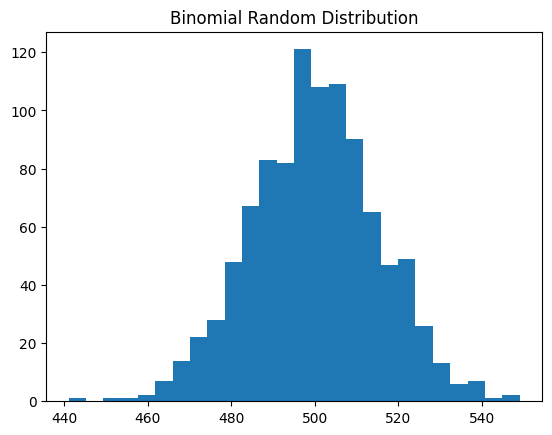

[526,
 506,
 483,
 494,
 478,
 489,
 500,
 496,
 501,
 520,
 519,
 511,
 508,
 496,
 511,
 474,
 511,
 492,
 506,
 510]

In [ ]:
BI = binomial(1000, 0.5, 1000) # with one trial is the same as a Bernoulli dist.
BI[0:20]

Con un (n=1) ensayo, es lo mismo que una Bernoulli

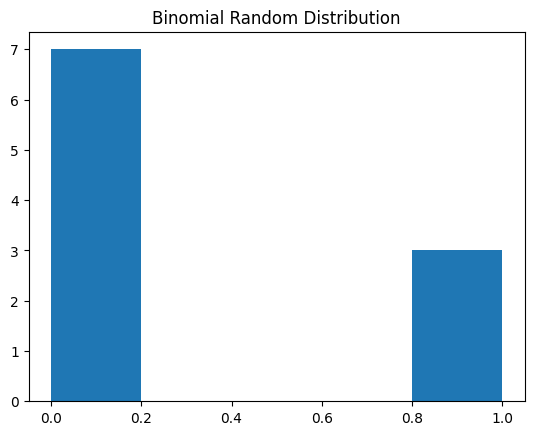

[1, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [ ]:
binomial(10, 0.5, 1)

##### **Simulación de la variable de Poisson $P(\lambda)$**

**Función de probabilidad de masa**:

$$P(X=k) = \frac{e^{-\lambda} \lambda^k}{k!} $$

No existe una fórmula explícita para la función de distribución y por ello F se genera acumulando las probabilidades anteriores que son generadas recursivamente:

$$p_{i+1} = \frac{\lambda}{i+1}\cdot 𝑝_i$$

Es decir

$$ p_0 = e^{-\lambda}, \quad p_1 = \lambda \cdot p_0 = e^{-\lambda}\cdot \lambda, \quad p_2 = \frac{\lambda}{2}\cdot p_1 = \frac{e^{-\lambda} \cdot \lambda^2}{2}, \dots $$

Pasos:

1. Inicialización $i=0; \quad p = e^-\lambda; \quad F=p$
2. Si $u<F$ entonces $x=i$. PARAR.
3. Definimos $p=\frac{\lambda}{i+1} \cdot p; \quad F= F+p; \quad i = i+1$. Ir al paso 2.

**Implementación:**

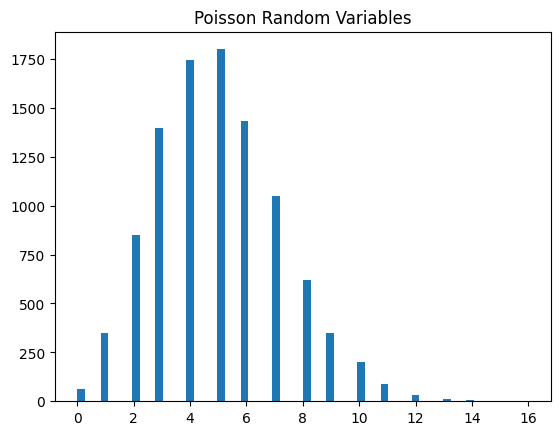

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def poisson(n=100, L=12):
    """
    Generate Poisson random variables and plot their histogram.

    Parameters:
    - n (int, optional): Number of random variables to generate. Defaults to 100.
    - L (float, optional): Lambda parameter for the Poisson distribution.
    Default is 12.

    Returns:
    - x (list): sample of a poisson distribution of n size.
    """

    _lambda = 12
    u = np.random.rand(n)

    # Using a for loop
    x = []
    for j in range(len(u)):
        i = 0
        p = np.exp(-L)
        F = p
        while u[j] > F:
            p = (L * p) / (i + 1)
            F = F + p
            i = i + 1
        x.append(i)

    # Plot histogram
    plt.hist(x, bins='auto')
    plt.title('Poisson Random Variables')
    plt.show()

    return x

x = poisson(n=10000,L=5)

##### **Simulación de una variable aleatoria Geométrica $G(p)$.**

Número de fracasos encontrados hasta lograr el primer éxito en un muestreo aleatorio con reemplazamiento, sabiendo que la probabilidad de éxito es $p$ y la probabilidad de fracaso es $1-p$

**Función de masa:**

$$P(X= k) = (1-p)^kp$$

**Notas:**

- Este método es bueno si $p$ es grande pues se supone que el número de iteraciones para generar un valor de $X$ es bajo ya que es probable que el valor de la $U(0,1)$ sea menor que $p$.

- Si $p$ es pequeño, puede ser necesario generar muchos valores $U(0,1)$ lo que jugaría en contra de la eficiencia computacional del algoritmo.

**Implementación:**


In [ ]:
import numpy as np

def geometric(p=0.1, n=1000):
    """
    Generate a discrete geometric random variable.

    Parameters:
    - p (float, optional): Probability of success. Default is 0.1.
    - n (int, optional): Number of iterations. Default is 1000.

    Returns:
    - x (list): A list of generated random variables.
    """
    x = []

    for j in range(1, n + 1):
        y = 0
        while True:
            u = np.random.rand(1)
            if u <= p:
                x.append(y)
                break
            else:
                y = y + 1

    plt.hist(x, bins='auto')
    plt.title('Geometric Random Variables distribution')
    plt.show()

    return x

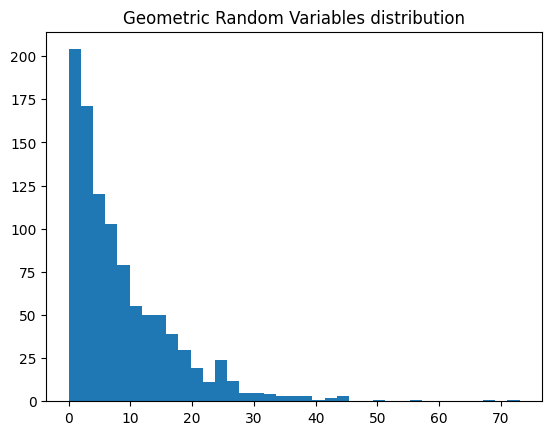

[25, 3, 2, 14, 8, 5, 24, 16, 19, 2, 2, 0, 1, 4, 3, 5, 3, 2, 5, 3]

In [ ]:
x = geometric()
x[0:20]

##### **Simulación de una variable aleatoria Hipergeométrica $H(N,D,p)$.**

Es como la Binomial, pero sin hacer reemplazamiento en el muestreo
Probabilidad de obtener $k$ unidades defectuosas ("éxitos") al extraer
$n$ unidades sin reemplazamiento de una población de tamaño $N$,
entre las que hay $D$ unidades defectuosas ("éxitos") y "$N-D$ unidades
no defectuosas ("fracasos").

**Función de masa:**

$$P(X=k) = \frac{\binom{D}{k}\binom{N-D}{n-k}}{\binom{N}{n}}$$

**Implementación:**

In [ ]:
import matplotlib.pyplot as plt
import random

def hypergeometric(N=500, D=50, n=50, size=1000):
    """
    Simulate a hypergeometric distribution and plot its histogram.

    Parameters:
    - N (int, optional): Population size. Defaults to 500.
    - D (int, optional): Number of success states in the population. Defaults to 50.
    - n (int, optional): Number of draws. Defaults to 50.
    - size (int, optional): Number of simulations. Defaults to 1000.

    Returns:
    - random_values (list): A list of random variables generated from the
    hypergeometric distribution.
    """
    random_values = []
    for _ in range(size):
        x = 0
        N_prime = N
        d = D
        c = N - D

        for _ in range(n):
            u = random.uniform(0, 1)  # Generar un número aleatorio en el intervalo [0, 1)

            if u <= d / N_prime:
                x += 1
                N_prime -= 1
                d -= 1
            else:
                N_prime -= 1
                c -= 1
        random_values.append(x)
    # Crear un histograma para visualizar los datos
    plt.hist(random_values, bins=range(min(random_values), max(random_values) + 1, 1), alpha=0.7, rwidth=0.85)
    plt.title(f'Distribución Hipergeométrica (N={N}, D={D}, n={n})')
    plt.xlabel('Número de Éxitos')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    return random_values

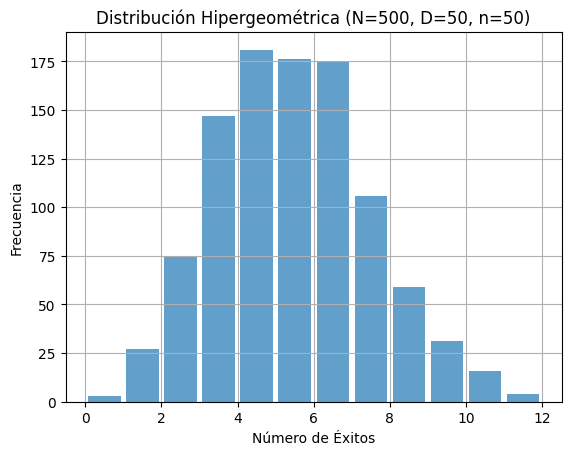

[1, 6, 2, 4, 9, 7, 6, 5, 5, 4, 6, 3, 3, 7, 4, 6, 9, 3, 3, 3]

In [ ]:
x = hypergeometric()
x[0:20]

##### **Simulación de la variable aleatoria Binomial Negativa $BN(m,p)$.**

Distribución que se obtiene al observar el número de fracasos encontrados antes de conseguir el
"m"-ésimo éxito en un muestreo aleatorio con reemplazamiento, siendo la probabilidad de éxito $p$.

**Función de masa:**

$$P(X=k) = \binom{m+k-1}{k}p^m(1-p)^k$$

**Implementación:**

In [ ]:
import random
import matplotlib.pyplot as plt

def negative_binomial(m = 10, p = 0.5, size = 10000):
    """
    Simulate a negative binomial distribution and plot its histogram.

    Parameters:
    - m (int, optional): Number of successes. Defaults to 10.
    - p (float, optional): Probability of success on each trial. Defaults to 0.5.
    - size (int, optional): Number of simulations. Defaults to 10000.

    Returns:
    - random_values (list): A list of random variables generated from the
    negative binomial distribution.
    """

    random_values = []
    for _ in range(size):
        trials = 0  # Count of Bernoulli trials
        successes = 0  # Count of successes

        while successes < m:
            trial_result = random.random()  # Generate a random number between 0 and 1
            if trial_result < p:
                successes += 1
            trials += 1

        random_values.append(trials)

    plt.hist(random_values, bins=range(min(random_values), max(random_values) + 1, 1), alpha=0.7, rwidth=0.85)
    plt.title(f'Negative Binomial Distribution (m={m}, p={p})')
    plt.xlabel('Number of Trials')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    return random_values

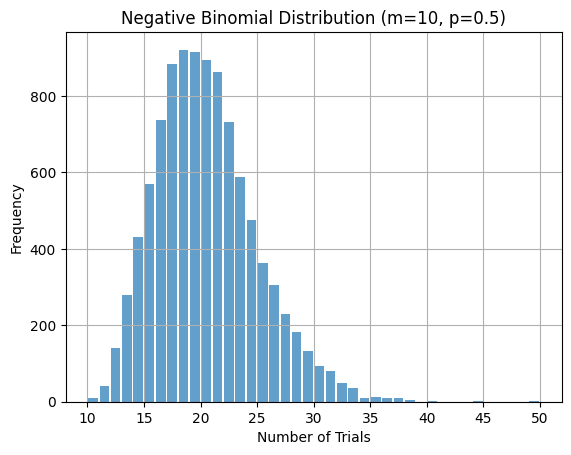

[14, 26, 17, 21, 23, 20, 15, 26, 23, 27]

In [ ]:
random_values = negative_binomial()
random_values[0:10]

### **Generación de variables aleatorias absolutamente continuas.**

Sea $X$ una v.a absolutamente continua con función de distribución acumulada $F_X(x)$.

El método más popular de generación de valores de estas distribuciones vuelve a ser el *Método de la Transformada Inversa*.


#### **Método de la transformada inversa.**

##### **Simulación de variable aleatoria del tipo uniforme $U(a,b)$.**

**Función de densidad:**

$$f_X(x) = \frac{1}{b-a}1_{(a,b)}$$

Donde la función $1_{(a,b)}$ es:

$$ 1_{(a,b)} =
\begin{cases}
1 \quad \text{si } x\in(a,b) & \\
0 \quad \text{si } x \notin (a,b) \\
\end{cases} $$

**Función de distribución:** (todas las funciones de distribución se sacan integrando la función de densidad para el intervalo donde estén definidas).

$F_x(x) = \frac{x-a}{b-a}$ si $a\le x\lt b$, $\quad F_X(x)=0$ en el resto.

**Algoritmo:**
1. Generar $u\sim U(0,1)$
2. Sea $X = a + U(b-a)$.

**Ejercicio**: Generar valores de una $U(10,25)$ mediante el método de la TI.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def uniform_cont(a = 10, b = 25, n = 100):
    """
    Simulate a continuous uniform distribution based on "a" and "b" parameters.

    Parameters:
    - a (int): minimum value of the uniform distribution.
    - b (int): maximum value of the uniform distribution.
    - n (int): trials of the experiment, size of the generated sample.

    Returns:
    - x (list): a list which contains the generated random variables.
    """
    x = []
    for i in range(n):
        u = np.random.uniform(0,1)
        x.append(a + u*(b-a))

    plt.plot(x, alpha=0.7)
    plt.title(fr'Uniform distribution $U({a},{b})$')
    plt.ylim(a*0.8, b*1.2)
    plt.xlabel('Frequency')
    plt.ylabel(r'x')
    plt.grid(True)
    plt.show()
    return x

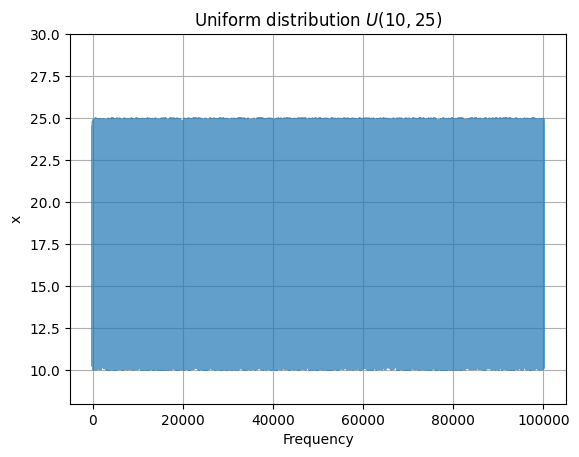

[17.39758845028533,
 22.672393981172885,
 20.643981112298118,
 22.997749179762764,
 18.70124294786815,
 22.814211228316235,
 11.040516863066903,
 11.783779726459334,
 17.069046233327455,
 17.294117242709696]

In [ ]:
x = uniform_cont(n=100000)
x[0:10]

##### **Simulación de variable aleatoria del tipo Exponencial $EXP(\lambda)$.**

**Función de densidad:**

$$f_X(x) = \lambda\cdot e^{-\lambda x} \times 1_{(0,\infty)}$$

**Función de distribución:**

$$F_X(x) =
\begin{cases}
0, & \quad \text{si } x\le 0 & \\
1 - e^{-\lambda x}, & \quad \text{si } x \ge 0
\end{cases} $$

$$ u = 1 - e^{-\lambda x} \Rightarrow e^{-\lambda x}= 1 - u \Rightarrow -\lambda x = log(1 - u ) \Rightarrow x = -\frac{1}{\lambda} log ( 1 - u ) \\
\Rightarrow x = -\frac{\log{(u)}}{\lambda} $$.


**Implementación:**

1. Generar $u\sim U(0,1)$.
2. Definir $X = \frac{-log{(U)}}{\lambda}$.

In [ ]:
def exponential(L = 1, n = 100):
    """
    Description:
    The exponential function generates a sample from the exponential
    distribution with rate parameter L.

    Parameters:
    - L (optional, default=1): The rate parameter of the exponential
    distribution. It represents the average rate of events occurring per
    unit of time.
    - n (optional, default=100): The number of samples to generate from the
    exponential distribution.

    Returns:
    - x: A list containing n samples from the exponential distribution.
    """
    x = [];
    for i in range(n):
        u = np.random.uniform(0,1)
        x.append(-np.log(u)/L)

    plt.plot(x, alpha=0.7, label = 'exponential rv')
    plt.title(fr'Exponential distribution $EXP({L})$')
    plt.xlabel('Frequency')
    plt.ylabel(r'x')
    plt.grid(True)
    plt.show()
    return x

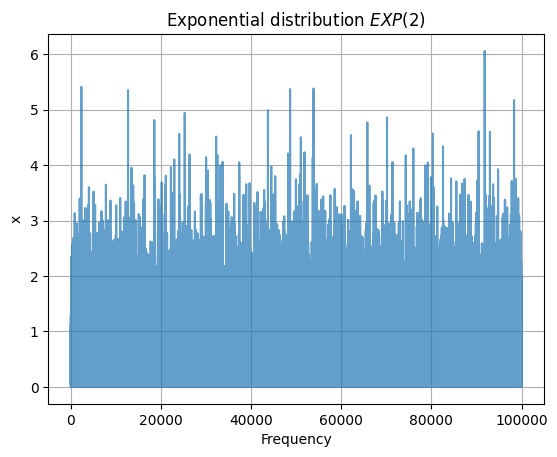

[0.19026986114895028,
 0.971392260334275,
 0.21523120052346809,
 0.14907142095248613,
 0.3592599906903745,
 0.16354772017807265,
 0.3616187409588443,
 0.035390332079765795,
 0.6307590092487715,
 0.39112819166891455]

In [ ]:
x = exponential(2,100000)
x[0:10]

##### **Simulación de variable aleatoria del tipo Weibull $W(\alpha, \beta)$.**

**Función de densidad:**

$$f_X(x) = \alpha\cdot \beta ^{\alpha} x^{\alpha - 1} \cdot e^{{-\beta x}^{\alpha}} $$

**Función de distribución:**

$$
F_X(x) =
\begin{cases}
0 & \quad \text{ si } x\lt 0 & \\
1 - e ^ {-{(\beta x)}^{\alpha}} & \quad \text{ si }x \ge 0
\end{cases}
$$

**Implementación:**

1. Generar $u\sim U(0,1)$.
2. Definir $X = \frac{{(-\log{u})}^{1/\alpha}}{\beta}$.

In [ ]:
def weibull(alpha = 1, beta = 1, n = 100):
    """
    Description:
    The weibull function generates a sample from the Weibull distribution with
    shape parameter alpha and scale parameter beta.

    Parameters:
    - alpha (optional, default=1): The shape parameter of the Weibull
    distribution. It determines the shape of the distribution curve.
    - beta (optional, default=1): The scale parameter of the Weibull
    distribution. It influences the spread or width of the distribution.
    - n (optional, default=100): The number of samples to generate from
    the Weibull distribution.

    Returns:
    - x: A list containing n samples from the Weibull distribution.
    """
    x = [];
    for i in range(n):
        u = np.random.uniform(0,1)
        x.append((-(np.log(u))**(1/alpha))/beta)

    plt.plot(x, alpha=0.7, label = 'exponential rv')
    plt.title(fr'Weibull distribution $W({alpha},{beta})$')
    plt.xlabel('Frequency')
    plt.ylabel(r'x')
    plt.grid(True)
    plt.show()
    return x

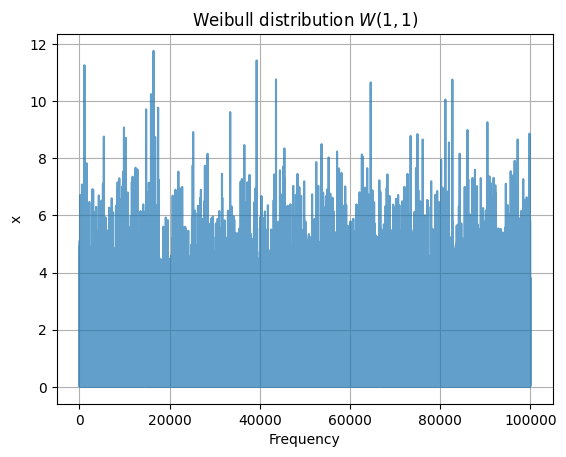

[0.06310357501144433,
 2.8536038146328195,
 0.11153088627652835,
 0.5871362289146537,
 1.3070337972026473,
 2.1439756643069474,
 0.04795345841588714,
 1.654143860052722,
 1.16791843715734,
 0.7570063377606405]

In [ ]:
x = weibull(n= 100000)
x[0:10]

##### **Simulación de variable aleatoria del tipo Gamma $\gamma(p,\lambda)$.**

Para la distribución $\gamma$ no existe una fórmula explícita para la $F.D.$, y por ello no es posible aplicar directamente el método de inversión. A tal fin, existen otros métodos de simulación como el método de rechazo (lo veremos más adelante).

###### Distribución del tipo Erlang $E(p, \lambda)$.

Caso particular cuando $p \in \mathbb{N}$.

Se puede observar que, si $X_1,X_2, \dots , X_p \sim Exp(\lambda)$ son v.a.i.i.d (Variables aleatorias independientes e idénticamente distribuidas) con $X_i \sim Exp (\lambda)$, entonces $\sum_{i=1}^{p} X_i \sim \gamma(p,\lambda)$.

----

Fue propuesta para examinar el número de llamadas telefónicas
que podrían hacerse al mismo tiempo a los operadores de
estaciones de conmutación.

De igual manera que la distribución exponencial, es una distribución habitual para simular
tiempos de espera (hasta la próxima llegada/llamada, hasta ser atendido, etc.) en los sistemas de
colas en general.

La distribución Erlang también se puede ver como la distribución del tiempo transcurrido hasta que se producen $p$ sucesos de un proceso de Poisson de parámetro $\lambda$. Dichos procesos, también están vinculados a la Teoría de Colas, utilizándose para saber el número de sucesos que ocurren en una cola (por ejemplo: llegadas de clientes) en un intervalo de tiempo $[0,t)$.

----

**Implementación:**

1. Generar $u_1, u_2, \dots, u_p \sim U(0,1)$ (independientes).
2. Definir $X = \frac{-log{u_1}}{\lambda} - \frac{-\log{u_2}}{\lambda} - \dots \frac{-\log{u_p}}{\lambda} = - \frac{\sum_{i=1}^{p} \log{u_i}}{\lambda} = - \frac{\log{(\sum_{i=1}^{p}{u_i})}}{\lambda}$

In [ ]:
def erlang(p = 100, L = 1, n = 100):
    """
    Description:
    The erlang function generates a sample from the Erlang distribution, also
    known as the gamma distribution with an integer shape parameter p.

    Parameters:
    - p (optional, default=100): The shape parameter of the Erlang distribution.
     It represents the number of events for which the waiting time is modeled.
    - L (optional, default=1): The rate parameter of the Poisson process.
    It indicates the average rate of events per unit of time.
    - n (optional, default=100): The number of samples to generate from the
    Erlang distribution.

    Returns:
    - X: A list containing n samples from the Erlang distribution.
    """
    X =[]
    for i in range(n):
        x = 0
        for i in range(p):
            u = np.random.uniform(0,1)
            x -= np.log(u)/L
        X.append(x)

    plt.plot(X)
    plt.title(fr'Erlang distribution $\gamma({p},{L})$')
    plt.xlabel('Frequency')
    plt.ylabel(r'x')
    plt.grid()
    plt.show()

    return X

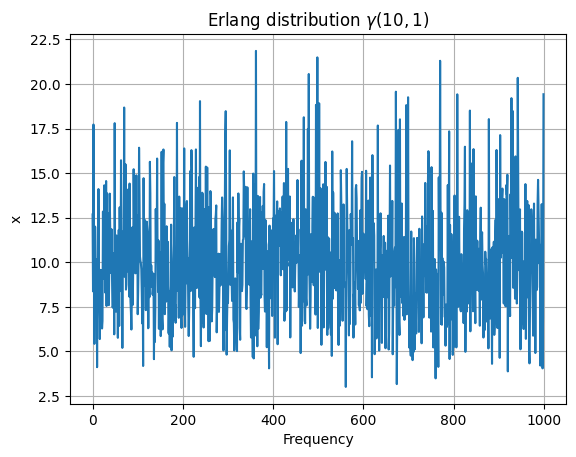

[12.68138003110193,
 8.366331698168752,
 17.72465136447859,
 11.74056129810727,
 5.422206626834183,
 12.009738559002383,
 11.971339007183504,
 9.874433994487473,
 7.400940211392795,
 10.150157116649998]

In [ ]:
x = erlang(p = 10, L = 1, n = 1000)
x[0:10]

#### **Método de Rechazo.**

Cuando no se conoce la $F.D$, el método de la Transformada Inversa no se puede aplicar. En dichos casos, es preciso recurrir a métodos alternativos.

La filosofía del método de Rechazo consiste en tomar la función de densidad $f_X$ asociada a la distribución y encajarla en un rectángulo.

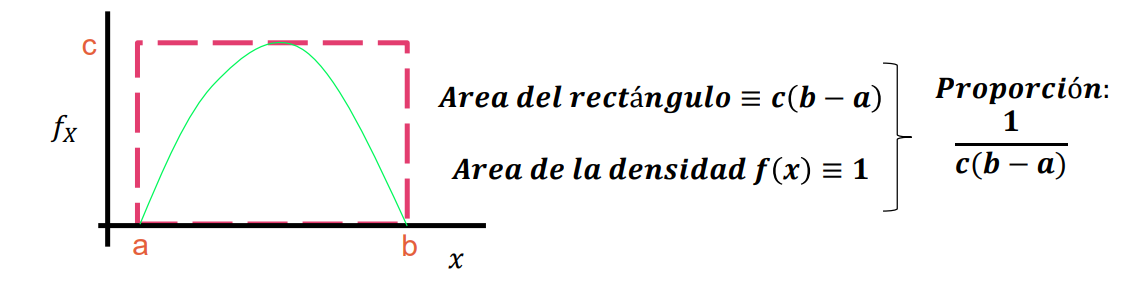

**Ejemplo:**

"Se lanza un dardo" x a la caja $\begin{cases} \text{Se genera un valor } & U(a,b) & \\
\text{Se genera un valor } & U(0,c)
\end{cases} \Rightarrow$

- Si cae "dentro" (por debajo de la curva), se acepta x como un valor que se distribuye según $f_X$.
- Si cae fuera (por encima), se rechaza.

Algoritmo
1. Let 𝑢1, 𝑢2 ∼ 𝑈 0,1
Let 𝑥 = 𝑎 + 𝑏 − 𝑎 × 𝑢1 ∈ 𝑎, 𝑏 and 𝑦 = 𝑐 × 𝑢2 ∈ 0, 𝑐
2. Let 𝑓𝑋 𝑥 . If 𝑦 > 𝑓𝑋 𝑥 , the go to Step 1.
3. Let 𝑥𝑜𝑢𝑡 = 𝑥

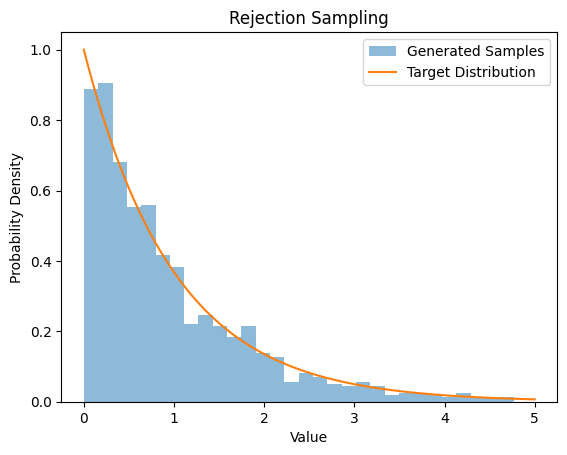

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rejection_sampling(target_distribution, proposal_distribution = 1,
                       a = 0, b = 5, c = 1, n = 1000):
    """
    Rejection sampling algorithm.

    Parameters:
    - target_distribution: Function representing the target probability density
    function.
    - proposal_distribution: Function representing the proposal probability
    density function.
    - a: Lower bound of the range for x.
    - b: Upper bound of the range for x.
    - c: Upper bound of the range for y (considered as the maximum value of the
    target distribution).
    - n: Number of samples to generate.

    Returns:
    - samples: List of n samples generated using rejection sampling.
    """

    samples = []

    while len(samples) < n:
        u1 = np.random.uniform(0, 1)
        u2 = np.random.uniform(0, 1)

        x = a + (b - a) * u1
        y = c * u2

        if y <= target_distribution(x):
            samples.append(x)

    return samples

def target_distribution(x):
    return np.exp(-x)
def proposal_distribution(x):
    return 1

a = 0; b = 5; c = 1; n = 1000
samples = rejection_sampling(target_distribution, proposal_distribution, a, b, c, n)

plt.hist(samples, bins=30, density=True, alpha=0.5, label='Generated Samples')
x_values = np.linspace(a, b, 100)
plt.plot(x_values, target_distribution(x_values), label='Target Distribution')
plt.title('Rejection Sampling')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

##### **Simulación de variable aleatoria del tipo Beta $B(\alpha,\beta)$.**

Para la distribución Βeta no existe una fórmula explícita para la F.D ⇒ método de rechazo.

**Función de distribución:**

$$f_X(x) = \frac{x^{\alpha-1}(a-x)^{\beta-1}}{B(\alpha,\beta}$$ con $$B(\alpha,\beta) = \frac{\Gamma(\alpha)\times \Gamma(\beta)}{\Gamma(\alpha + \beta)}$$

**Implementación:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def target_beta_distribution(x, alpha=2, beta=2):
    """
    Mathematical expression of the fdp for the beta distribution.
    """
    return (x**(alpha-1) * (1-x)**(beta-1)) / ((2**(alpha+beta-1)) \
    / (np.math.factorial(alpha-1) * np.math.factorial(beta-1)))

def beta(n=100, alpha=2, beta=2):
    """
    Generate samples from the beta distribution using the rejection sampling method.

    Parameters:
    - n: Number of samples to generate (default=100).
    - alpha: Shape parameter (default=2).
    - beta: Shape parameter (default=2).

    Returns:
    - samples: List of n samples generated using rejection sampling.
    """
    samples = []

    # Constant for the envelope function
    c = target_beta_distribution(1, alpha, beta)

    while len(samples) < n:
        u1, u2 = np.random.uniform(0, 1, 2)

        x = u1
        y = c * u2

        if y <= target_beta_distribution(x, alpha, beta):
            samples.append(x)

    plt.hist(samples, bins=30, density=False, alpha=0.5, label='Generated Samples')
    x_values = np.linspace(0, 1, 100)
    plt.title('Rejection Sampling for Beta Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

    return samples

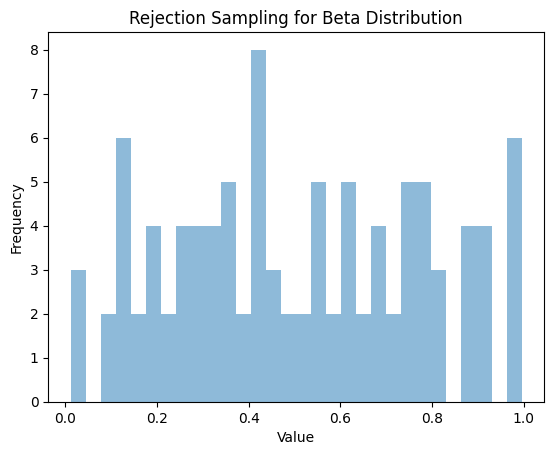

[0.4212234675673373,
 0.1875544275747506,
 0.08280913854086636,
 0.8086264528920879,
 0.4822582188963437,
 0.796694753284177,
 0.7050849104574479,
 0.6220838638958051,
 0.12239765251736034,
 0.26553404267041736]

In [ ]:
x = beta(n=100) # the higher number of samples, the most similar to a uniform.
x[0:10]

#### **Método del Rechazo Generalizado.**

----

El método de Rechazo sirve para generar la distribución Beta, distribuciones rectangulares y en
general todas aquellas con funciones de densidad definidas sobre un dominio acotado.

Sin embargo, el método no valdría para simular valores de la distribución Normal pues en dicho
caso no es posible “encajarla” (su soporte varía entre $-\infty$ y $+\infty$, no está acotada).

----

La idea del método Rechazo Generalizado (von Neumann, 1951) es utilizar una envoltura $g_X$
más ajustada a la función de densidad $f_X$ con la que resultara más fácil no rechazar. La
envolvente $g_X$ debe cumplir las siguientes propiedades:

1. Su soporte debe contener al soporte de $f_X$.
2. Debe permitir envolver a $f_X$, es decir, que $\exists a \gt 1$ tal que $f(x) \le a \times g(x),\quad \forall x \in\mathbb{R}$.
3. *Preferiblemente* debería ser invertible para poder aplicar el método de la Transformada Inversa de cara a simular valores suyos.

**Algoritmo:**

1. Sea $x\in g(\cdot)\;$ e $\;y \in (0, a\times g(x))$ $\quad y = u \cdot a \cdot g (x) $.
2. Calcular $f(x)$. Si $y \gt f(x)$, entonces ir al paso 1.
3. Definir $x_{out} = x$.

**Implementación sobre una gaussiana:**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rejection_generalized_method(f, g, a = 2, n = 1000):
    """
    Generalized rejection sampling algorithm.

    Parameters:
    - f: Function representing the target probability density function.
    - g: Function representing the envelope (safety) probability density function.
    - a: Upper bound for the envelope function (default=2).
    - n: Number of samples to generate (default=1000).

    Returns:
    - samples: List of n samples generated using generalized rejection sampling.
    """

    samples = []

    while len(samples) < n:
        x = np.random.uniform()  # Generate x from the proposal distribution g
        y = np.random.uniform(0, a * g(x))  # Generate y from U(0, a * g(x))
        if y <= f(x):
            samples.append(x)

    plt.hist(samples, bins=30, density=True, alpha=0.5, label='Generated Samples')
    x_values = np.linspace(0, 3, 100)
    plt.plot(x_values, target_distribution(x_values), label='Target Distribution')
    plt.title('Generalized Rejection Sampling')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

    return samples

def target_distribution(x):
    return np.exp(-x**2)
def envelope_distribution(x):
    return 1

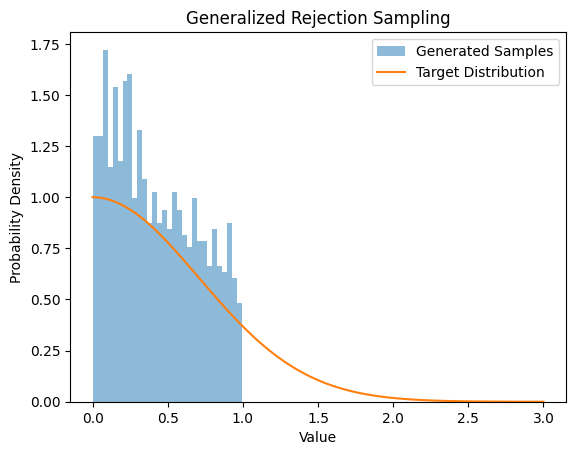

In [ ]:
a = 2
n = 1000
samples = rejection_generalized_method(target_distribution, envelope_distribution, a, n)

##### **Simulación de una variable Normal $N(\mu,\sigma^2)$.**

$$X \sim^{d} N(\mu,\sigma^2) \Rightarrow Z = \frac{X-\mu}{\sigma} \sim^{d} N(0,1)$$

Ejercicio: Programar el método de rechazo generalizado para la Normal, utilizando como envolvente la distribución logística: $g(x) = \frac{e^{-x}}{{(1+e^-{x})}^2}$. Generar 1000 valores y calcular su media y varianza.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def normal(n=1000):
    """
    Normal distribution with parameters (mu = 0, sigma = 1).

    Parameters:
    - n: number of samples to generate.

    Returns:
    - Xs: generated samples.
    """
    Xs = np.zeros(n)

    for i in range(len(Xs)):
        u_1 = np.random.uniform(0, 1)
        u_2 = np.random.uniform(0, 1)
        x_i = -np.log(1/u_1 - 1)
        y_i = u_2 * 4/np.sqrt(2*np.pi) * np.exp(-x_i) / ((1+np.exp(-x_i))**2)

        while y_i > np.exp(-(x_i**2)/2) / np.sqrt(2*np.pi):
            u_1 = np.random.uniform(0, 1)
            u_2 = np.random.uniform(0, 1)
            x_i = -np.log(1/u_1 - 1)
            y_i = u_2 * 4/np.sqrt(2*np.pi) * np.exp(-x_i) /((1+np.exp(-x_i))**2)

        Xs[i] = x_i

    # Plot the histogram
    plt.hist(Xs, bins = 30, density=True, alpha=0.5)
    plt.title(r'Normal distribution')
    plt.xlabel(r'x')
    plt.ylabel('Probability')
    plt.show()

    return Xs

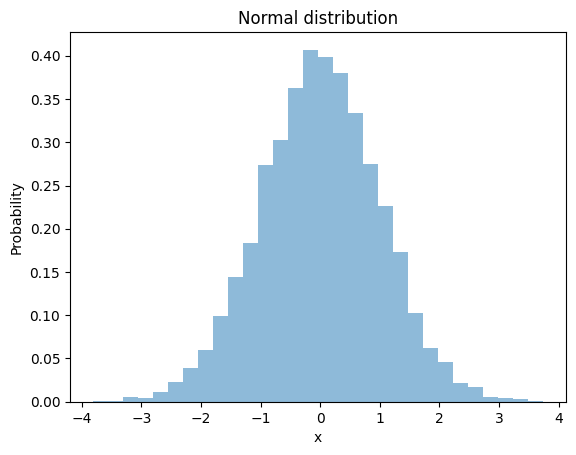

La media es 0.0031762969299523568 y la varianza es 0.9997578019480942


In [ ]:
x = normal(n=10000)
mu = np.mean(x)
sigma = np.std(x)
print(f'La media es {mu} y la varianza es {sigma**2}')

Implementación para cualquier valor de $\mu$ y $\sigma$:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def normal_generalized(mu=0, sigma= 1, n=1000):
    """
    Normal distribution with parameters (mu = 0, sigma = 1).

    Parameters:
    - n: number of samples to generate.

    Returns:
    - Xs: generated samples.
    """
    Xs = np.zeros(n)

    for i in range(len(Xs)):
        u_1 = np.random.uniform(0, 1)
        u_2 = np.random.uniform(0, 1)
        x_i = mu + sigma * (-np.log(1/u_1 - 1))
        y_i = u_2 * np.exp(-(x_i-mu)**2 / (2*sigma**2)) / \
        (sigma * np.sqrt(2*np.pi))

        while y_i > np.exp(-(x_i**2)/2) / np.sqrt(2*np.pi):
          # dnorm(x_i, mean=0, sd=1) in R is equivalent
          # to exp(-(x_i^2)/2) / sqrt(2*pi) in Python
            u_1 = np.random.uniform(0, 1)
            u_2 = np.random.uniform(0, 1)
            x_i = mu + sigma * (-np.log(1/u_1 - 1))
            y_i = u_2 * np.exp(-(x_i-mu)**2 / (2*sigma**2)) / \
            (sigma * np.sqrt(2*np.pi))

        Xs[i] = x_i

    # Plot the histogram
    plt.hist(Xs, bins = 30, density=True, alpha=0.5)
    plt.title(fr'Normal distribution $N({mu}{sigma})$')
    plt.xlabel(r'x')
    plt.ylabel('Probability')
    plt.show()

    return Xs

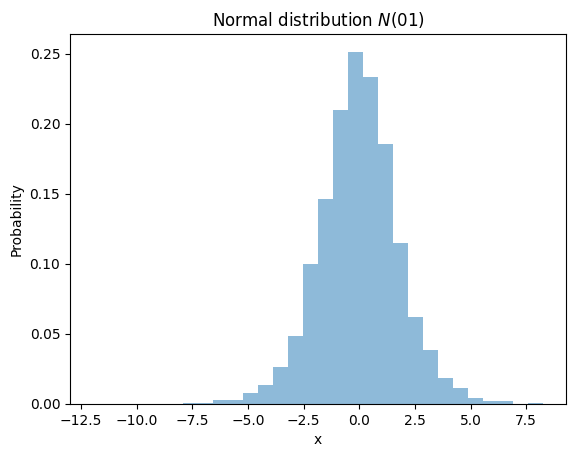

array([ 0.02996055, -0.23826357,  3.6257187 , ..., -1.69481959,
        0.21443224,  2.33708327])

In [ ]:
normal_generalized(n=10000)

#### **Método de composición**

El método de composición se utiliza cuando resulta complicado simular valores de una densidad,
pero sin embargo ésta se puede expresar como una suma ponderada de densidades para las
cuales sí es fácil simular sus valores (por ejemplo, por el método de la transformada inversa).
Este método es válido para **generar puntos de algunas distribuciones** conocidas como la
**Trapezoidal, la Triangular o la Doble Exponencial** (Laplace).

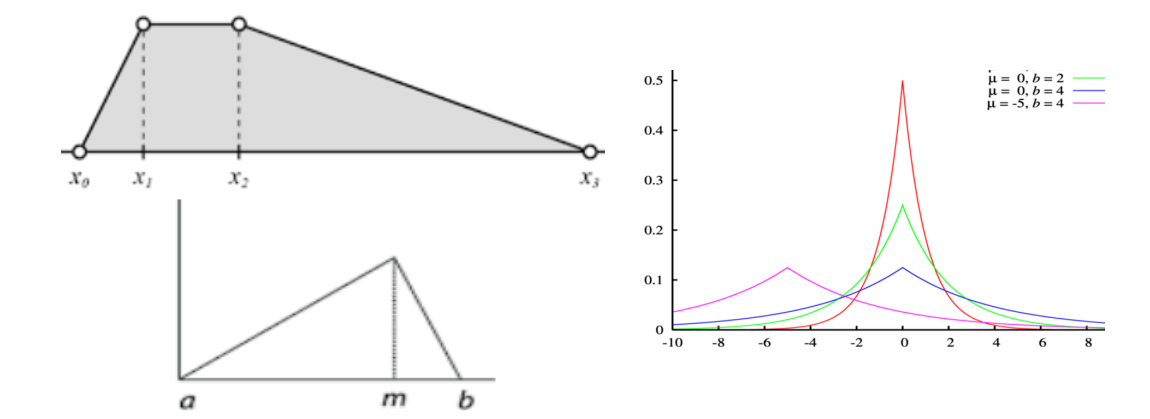


En concreto, el método permite generar valores de una variable aleatoria 𝑋~𝑓(.) en aquellos casos en
los que:

$\exists \; t.q. f(x) = t \times f_1(x) + (1 - t) \times f_2(x) \quad \text{con } X_1 \sim f_1 (\ldots)$ y $X_2 \sim f_2(\cdot).
$

Basta observar que obtener valores de $f(\cdot)$ es equivalente a obtener valores de $f_1(\cdot)$ y $f_2(\cdot)$ ⋅ con
probabilidades $t$ y $1-t$ respectivamente.

**Algoritmo:**
1. Generar $u \in U(0,1)$.
2. Si $u\lt t$ entonces hacer $x \in f_1(\cdot)$.
3. Definir $x_{out} = x$.

##### Simulación de la variable doble exponencial o distribución de Laplace $L(\lambda,\beta)$.

In [ ]:
def laplace(L=1, b=1, n=100):
    """
    Generate random samples from a Laplace distribution.

    Parameters:
    - L: Location parameter (default=1).
    - b: Scale parameter (default=1).
    - n: Number of samples to generate (default=100).

    Returns:
    - x: Array of generated samples.
    """
    u1 = np.random.uniform(0, 1, n)
    u2 = np.random.uniform(0, 1, n)
    x = np.where(u1 <= 0.5, mu - b * np.log(u2), mu + b * np.log(u2))

    plt.hist(x, bins = 30, density=True, alpha=0.5)
    plt.title(fr'Laplace distribution $L({L},{b})$')
    plt.xlabel(r'x')
    plt.ylabel('Probability')
    plt.show()
    return x

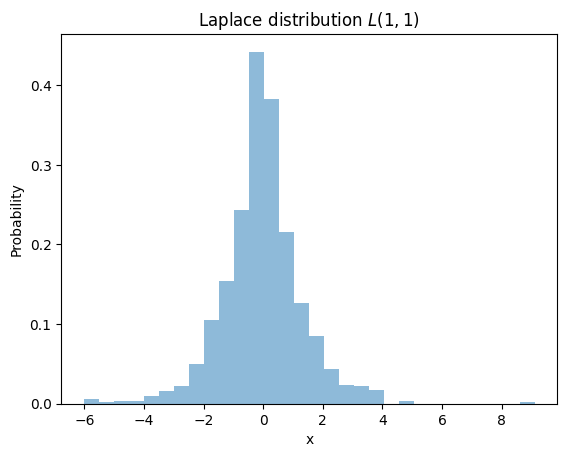

In [ ]:
x = laplace(n=1000)

##### **Otras formas de generar la distribución normal**

1. Box Muller

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def box_muller_normal(n):
    """
    Generate n random numbers from a standard normal distribution using Box-Muller method.

    Parameters:
    - n: Number of random numbers to generate.

    Returns:
    - random_numbers: Array of generated random numbers.
    """
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)

    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    random_numbers = np.concatenate([z1, z2])

    plt.hist(random_numbers, bins=30, density=True, alpha=0.5)
    plt.title('Generated Normal Random Numbers')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.show()

    return random_numbers

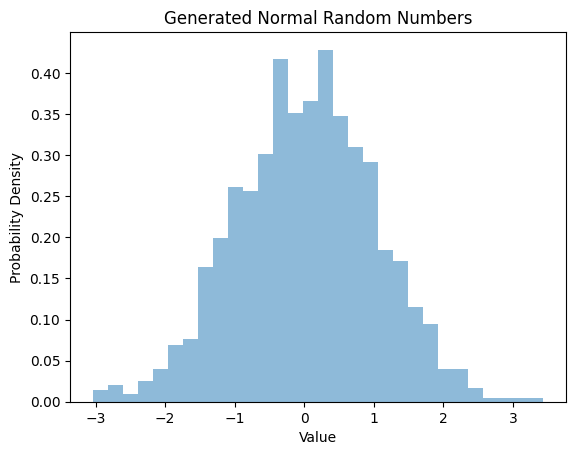

In [ ]:
n_samples = 1000
random_numbers = box_muller_normal(n_samples)

2. Método de Marsaglia (Marsella):

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def marsaglia_normal(n):
    """
    Generate n random numbers from a standard normal distribution using Marsaglia's polar method.

    Parameters:
    - n: Number of random numbers to generate.

    Returns:
    - random_numbers: Array of generated random numbers.
    """
    random_numbers = np.zeros(n)
    i = 0

    while i < n:
        u = 2 * np.random.rand() - 1
        v = 2 * np.random.rand() - 1
        s = u**2 + v**2

        if 0 < s < 1:
            x = u * np.sqrt(-2 * np.log(s) / s)
            y = v * np.sqrt(-2 * np.log(s) / s)

            random_numbers[i] = x
            i += 1

            if i < n:
                random_numbers[i] = y
                i += 1

    plt.hist(random_numbers, bins=30, density=True, alpha=0.5)
    plt.title("Generated Normal Random Numbers (Marsaglia's Method)")
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.show()

    return random_numbers

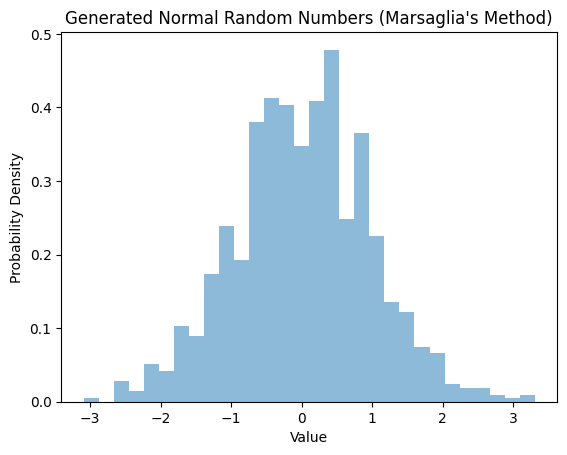

array([-0.47980473, -0.63982361,  0.61088848,  1.63723973, -0.06350304,
        0.71789318,  0.34419563, -1.70845523, -0.02822008,  0.12864446])

In [ ]:
n_samples = 1000
x = marsaglia_normal(n_samples)
x[0:10]

3. Teorema central del límite.

In [ ]:
def limit_central_theorem_normal(n):
    """
    Generate n random numbers from a standard normal distribution using the Central Limit Theorem.

    Parameters:
    - n: Number of random numbers to generate.

    Returns:
    - random_numbers: Array of generated random numbers.
    """
    random_numbers = np.zeros(n)

    for i in range(n):
        # Suma de 12 variables aleatorias uniformes [-0.5, 0.5]
        sum_uniforms = np.sum(np.random.uniform(-0.5, 0.5, 12))
        random_numbers[i] = sum_uniforms

    # Plot the histogram of generated random numbers
    plt.hist(random_numbers, bins=30, density=True, alpha=0.5)
    plt.title("Generated Normal Random Numbers (Central Limit Theorem)")
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.show()

    return random_numbers

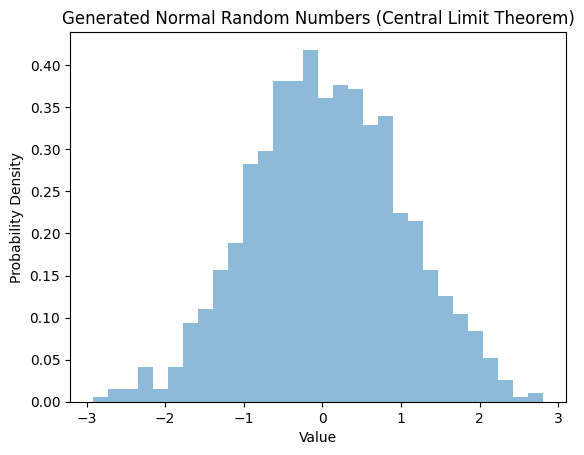

array([-0.6275541 ,  0.48952389,  2.36269176, -0.21512622, -0.44566883,
       -1.37188278, -0.33938479, -0.32825917,  0.9677809 , -0.75295013,
        0.24904401,  0.87724355, -0.11905688,  0.54773849, -0.17132711,
        0.26823925,  0.62149702,  1.40624641, -1.06467103,  1.73107173])

In [ ]:
n_samples = 1000
x = limit_central_theorem_normal(n_samples)
x[0:20]

##### **Simulación de la variable aleatoria Lognormal $LN(\sigma,\mu)$.**

Si $\eta \sim N(\mu,\sigma^2) \Rightarrow \xi = e ^\eta \sim LN(\mu,\sigma^2) $.

Lógicamente:
$\log(\xi) \sim N(\mu, \sigma^2)$.

**Función de densidad:**
$$f_\xi (x) = \frac{1}{x\sqrt{2\pi\sigma^2}}e^{-\frac{\log{(x-\mu)^2}}{2\sigma^2}}$$

**Algoritmo:**
1. Define $\eta \in N(\mu, \sigma^2)$.
2. Define $x_{out} = e^\eta$.

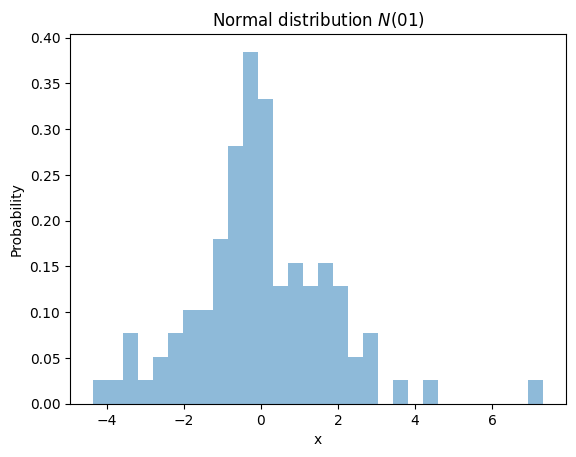

(array([98.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([1.26858660e-02, 5.09417088e+01, 1.01870732e+02, 1.52799755e+02,
        2.03728778e+02, 2.54657801e+02, 3.05586824e+02, 3.56515847e+02,
        4.07444870e+02, 4.58373893e+02, 5.09302916e+02, 5.60231939e+02,
        6.11160962e+02, 6.62089985e+02, 7.13019008e+02, 7.63948031e+02,
        8.14877054e+02, 8.65806077e+02, 9.16735100e+02, 9.67664123e+02,
        1.01859315e+03, 1.06952217e+03, 1.12045119e+03, 1.17138021e+03,
        1.22230924e+03, 1.27323826e+03, 1.32416728e+03, 1.37509631e+03,
        1.42602533e+03, 1.47695435e+03, 1.52788338e+03]),
 <BarContainer object of 30 artists>)

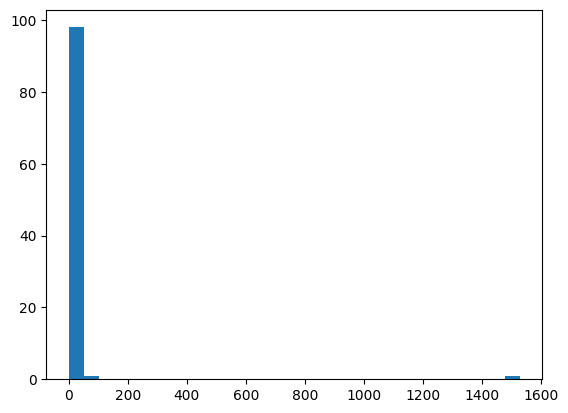

In [ ]:
# tambien valido
# normal = np.random.normal(0,1,100)
# lognormal = np.exp(normal)

x = np.exp(normal_generalized(mu=0,sigma=1,n=100))
plt.hist(x, bins=30)

##### **Simulación de variable aleatoria Chi-cuadrado $\chi^2_n $**

**Función de densidad:**

$$f_X(x) = \frac{\frac{1}{2}^{n/2} e^{-x/2} x^{n/2-1}}{\Gamma(n/2)}$$

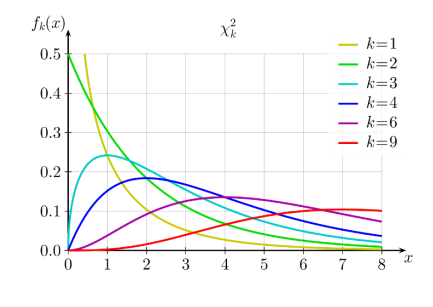

**Método 1**. A partir de la suma de normales al cuadrado

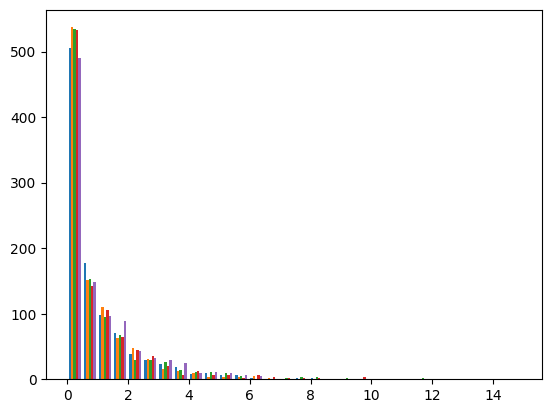

In [ ]:
m = 1000
n = 5
x = []
for i in range(n):
    x.append(np.random.normal(0,1,m)**2)

plt.hist(x, bins = 30)
plt.show()

**Método 2.**

1. Generar $x_1, \ldots, x_n$ variables aleatorias independientes e idénticamente distribuidas $(v.a.i.i.d)$ en $\mathcal{N}(0,1)$ $\Rightarrow$ Hacer $x = \sum_{i=1}^{n} x_i^2$.


2. $\chi_{\frac{n}{2}} \sim \gamma_p = \text{Erlang}\left(\frac{n}{2}, \frac{1}{2}\right)$, donde $\lambda = \frac{1}{2}$. Si $n$ es par. Entonces $\frac{n}{2}$ es un número entero y $\chi_{\frac{n}{2}} \sim \text{Erlang}\left(\frac{n}{2}, \frac{1}{2}\right)$.

3. Si $n$ es impar, $X = Y + X_{\frac{n}{2}}$ con $Y \sim \chi_{n-1}^{2}$ (si $n-1$ es par). Basta con generar una Erlang y una Normal.

Es decir, basta con generar $u_1, \ldots, u_{\frac{n-1}{2}} \in \mathcal{U}(0,1)$ y $z \in \mathcal{N}(0,1) \Rightarrow X = -2 \sum_{i=1}^{\frac{n-1}{2}} \log u_i + z^2$.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def chi_squared(n=20, N=1000):
    """
    Description:
    simulates a chi-squared distribution with a specified number of degrees of
    freedom and a specified number of iterations (trials).

    Parameters:
    - n (int): Degrees of freedom for the chi-squared distribution.
    Default = 20.
    - N (int): Number of repetitions, i.e., the number of random samples to
    generate. Default = 1000

    Returns:
    - chi2 (list): a list of generated samples.
    """
    chi2 = np.array([])

    for i in range(1, N + 1):
        if n % 2 == 0:
            if np.floor(n / 2) > 1:
                u = np.random.uniform(0, 1, int(n / 2))
                chi2 = np.concatenate((chi, [-2 * np.sum(np.log(u))]))
        else:
            if np.floor(n / 2) >= 1:
                u = np.random.uniform(0, 1, int((n - 1) / 2))
                z = np.random.normal(0, 1, 1)
                chi2 = np.concatenate((chi, [-2 * np.sum(np.log(u)) + z**2]))

    plt.hist(chi2, bins=30, edgecolor='black')
    plt.show()

    return chi2

##### **Simulación de una variable aleatoria T-Student $t_n$.**

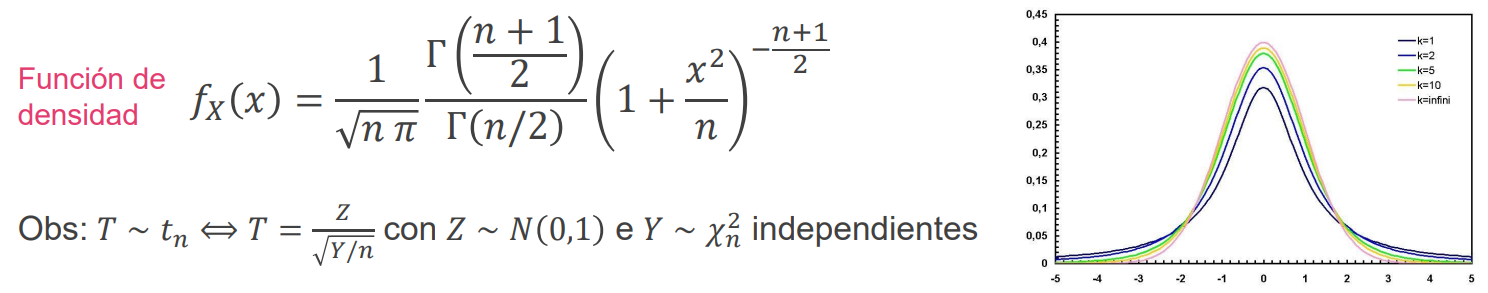

**Algoritmo:**

1. Sea $z \in N(0,1)$. Sea $y \in \chi_n^2$.

2. Sea $x = \frac{z}{y/n}$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def t_student(n = 1000):
    """
    Description:
    - Simulate a T-Student distribution.
    Parameters:
    - n (int): number of trials.
    Returns:
    - x (list): a list with the sample size (n)
    """
    x = np.array([])
    for i in range(1000):
        z = np.random.normal(0, 1, 1)
        y = np.random.chisquare(n, 1)
        x = np.concatenate((x, z / np.sqrt(y / n)))

    plt.hist(x, bins=30, edgecolor='black')
    plt.show()

    return x

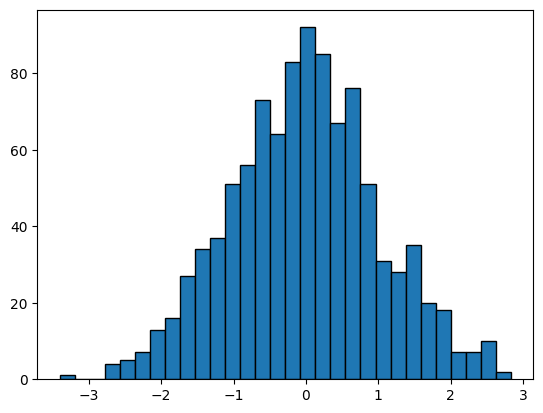

array([ 0.21412838,  0.12125947, -0.20039423, -1.31834291,  0.51387501,
        0.40848198,  0.91262296, -0.76166866,  0.55898794, -1.23427012,
        0.84886494, -1.03662736, -0.22001506, -0.98301909, -1.35077714,
       -0.99405026, -0.4431106 ,  1.69897876, -2.07591021, -1.65888436])

In [ ]:
x = t_student(n=1000)
x[0:20]

##### Simulación de variable aleatoria F-Snedecor $F_m,n$.

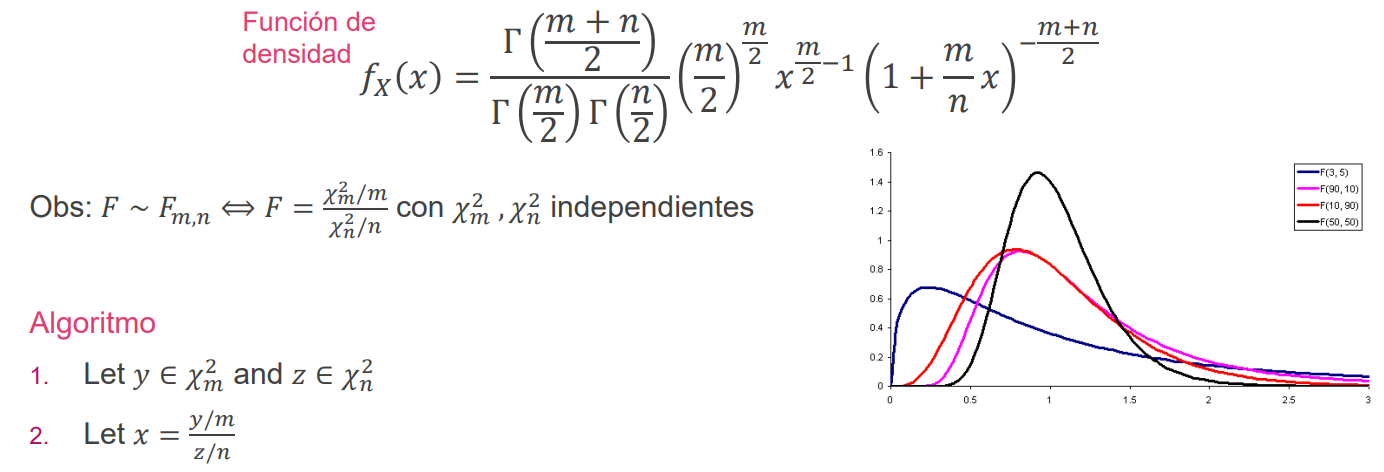

**Implementación:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def F_distribution(n = 10, m = 9):
    """
    Simulates samples from an F-distribution and visualizes the resulting
    histogram.

    Parameters:
    - n (int): Numerator degrees of freedom for the F-distribution. Default=10.
    - m (int): Denominator degrees of freedom for the F-distribution. Default=9.

    Returns:
    - x (numpy.ndarray): Array of simulated samples from the F-distribution.
    """
    x = np.array([])

    for i in range(1000):
        z = np.random.chisquare(n, 1)
        y = np.random.chisquare(m, 1)
        x = np.concatenate((x, (y/m) / (z/n)))

    plt.hist(x, bins=30, edgecolor='black')
    plt.title('Histogram of F-distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

    return x

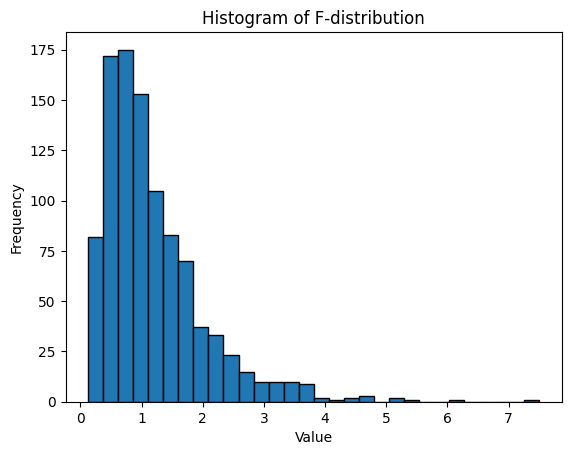

array([1.14910022, 1.78828813, 2.78902971, 2.16634581, 1.07410493,
       3.77334931, 1.2063969 , 1.33298718, 0.16806128, 1.00327496])

In [ ]:
x = F_distribution()
x[0:10]

### **Generación de variables aleatorias mixtas**

**VV.AA. mixtas**: no son ni continuas ni discretas
(Su función de distribución tiene segmentos de crecimiento continuo, pero también discontinuidades).

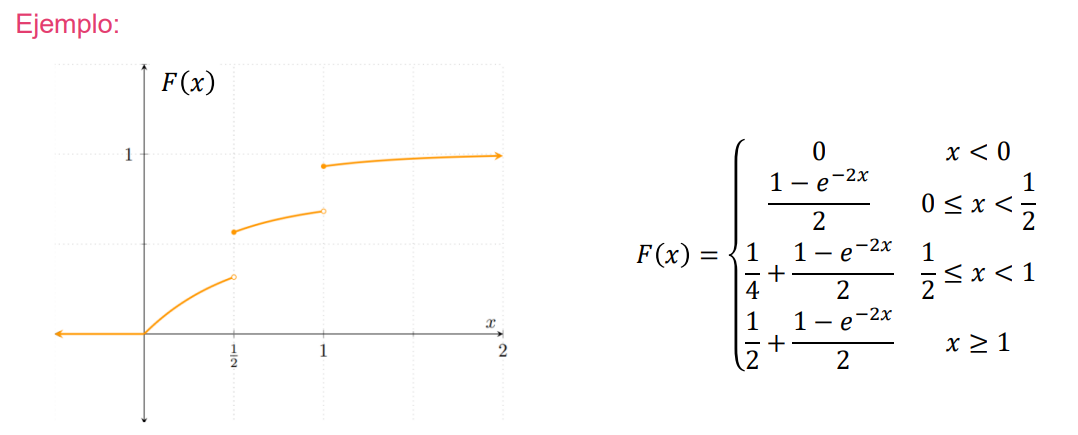

Se forma concatenando la F.D. de la variable aleatoria continua y la discreta, de la forma siguiente:

$$F(⋅) = \lambda F_c(\cdot) + (1-\lambda) F_D(\cdot).$$

Siendo $F_D$ la función discreta y siendo $F_c$ la absolutamente continua.

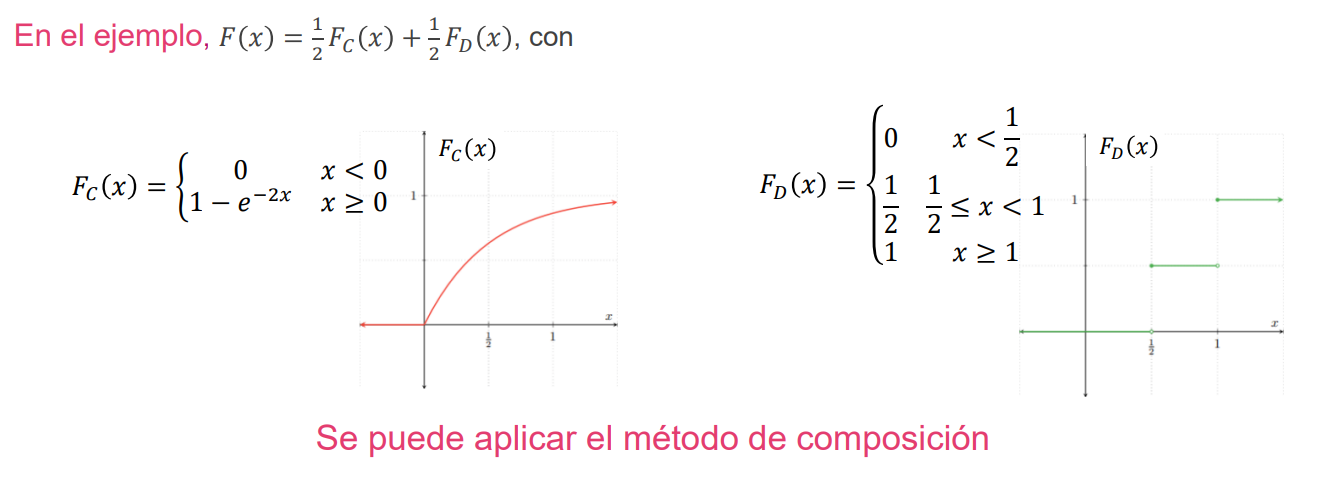

### **Generación de variables aleatorias multidimensionales.**



#### **Generación de una variable aleatoria del tipo Multinomial $MN(n,p_1,p_2,\dots, p_{k-1})$.**

**Función de masa:**
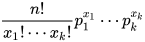

La distribución multinomial plantea la división de una población en $k$ clases $A_i$ asociadas a las
cuales hay una proporción $p_i$ = $P(A_i)$, con $\sum_{i=1}^kp_i=1$.

De dicha población se extraen n elementos con reemplazamiento. Si $X_i$ es el número de elementos extraídos de la clase $i \Rightarrow X  =(X_1, X_2, \dots, X_{k-1}) \sim MN(n,p_1,p_2, \dots, p_{k-1})$.

**Implementación:**

In [ ]:
import seaborn as sns
import numpy as np

def multinomial(k = 4, N = 1000, n = 25):
    """
    Generates samples from a multinomial distribution and stores them in a
    matrix.

    Parameters:
    - k (int): Number of categories in the multinomial distribution. Default=4.
    - N (int): Number of samples to generate. Default=1000.
    - n (int): Total number of trials in each sample. Default=25.

    Returns:
    - X (numpy.ndarray): Matrix of generated samples with dimensions (N, k).
    """

    # Initialize matrix X
    X = np.zeros((N, k), dtype=int)

    # Define probabilities for each category
    p = np.array([1, 1/2, 1/3, 1/4])
    p = p / np.sum(p)

    # Generate samples
    for idx in range(N):
        X[idx, 0] = np.random.binomial(n, p[0])
        for i in range(1, len(p)-1):
            remaining_trials = n - np.sum(X[idx, 0:i])
            adjusted_prob = p[i] / (1 - np.sum(p[0:i]))
            X[idx, i] = np.random.binomial(remaining_trials, adjusted_prob)
        X[idx, -1] = n - np.sum(X[idx, 0:(len(p)-1)])

    sns.histplot(X, bins=30, label=f'Multinomial', kde=True).\
                 set(title=rf'Multinomial distribution $MN({n},{k})$')

    return X

array([[13,  4,  6,  2],
       [11,  7,  5,  2],
       [12,  2,  8,  3],
       [14,  5,  2,  4],
       [16,  8,  0,  1],
       [16,  6,  2,  1],
       [16,  4,  1,  4],
       [12,  2,  5,  6],
       [13,  9,  1,  2],
       [13,  8,  3,  1]])

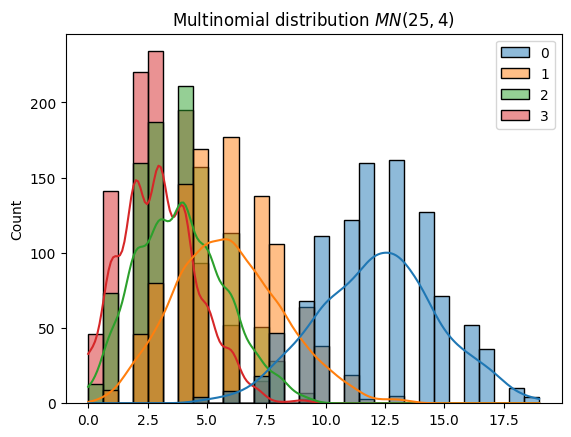

In [ ]:
x = multinomial()
x[0:10]

#### **Simulación de una variable aleatoria del tipo Normal multivariante $N(𝞵, \Sigma)$

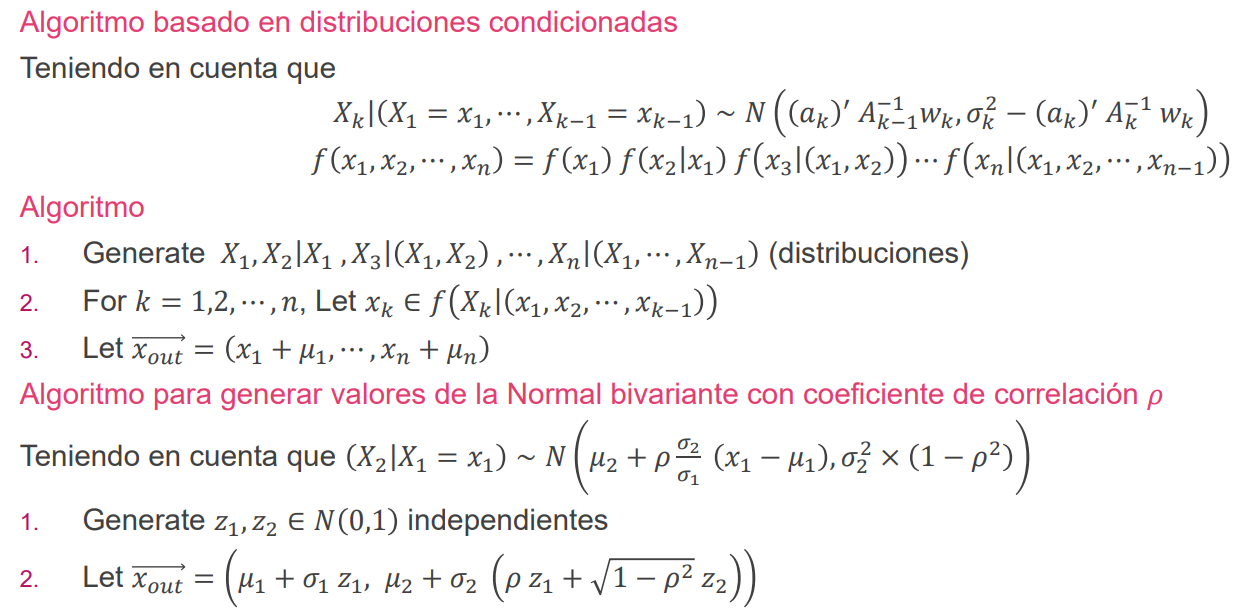



In [ ]:
import numpy as np

def multivariate_normal(mu = [0,0], sigma = [[2,1],[1,1]], n = 2, m = 10):
    """
    Generates samples from a multivariate normal distribution.

    Parameters:
    - mu (numpy.ndarray): Mean vector of the multivariate normal distribution.
    Default = 0
    - sigma (numpy.ndarray): Covariance matrix of the multivariate normal
    distribution. Default = 0.5
    - n (int): Number of dimensions in the multivariate normal distribution.
    Default = 10.
    - size (int): Number of samples to generate. Default = 1000.

    Returns:
    - samples (list): List of generated samples.
    """

    # Cholesky decomposition of the covariance matrix
    L = np.linalg.cholesky(sigma)

    # Initialize list
    samples = []

    # Generate samples
    for i in range(m):
        z = np.random.normal(0, 1, n)
        x = mu + np.dot(L, z)
        samples.append(x.tolist())

    sns.histplot(samples, bins=30, kde=True).\
                 set(title=rf'Multivariate Normal distribution $N({mu},{sigma})$')

    return samples

[[2.116397361462901, 1.8758022249095205],
 [1.3633047985508675, 0.45988115845215916],
 [-1.2353252377892239, -1.7603195227700648],
 [-0.8416678260987567, 0.47012577029635544],
 [-0.9642894410825715, -1.0326823111651027],
 [-1.0216702547194807, -0.4291970792216923],
 [-0.9232621999017062, -0.3054364772202674],
 [0.6714622884363606, 0.9361210380247252],
 [0.47134846926734286, -0.3218872869099852],
 [1.4339490759030264, 1.0730871183433452]]

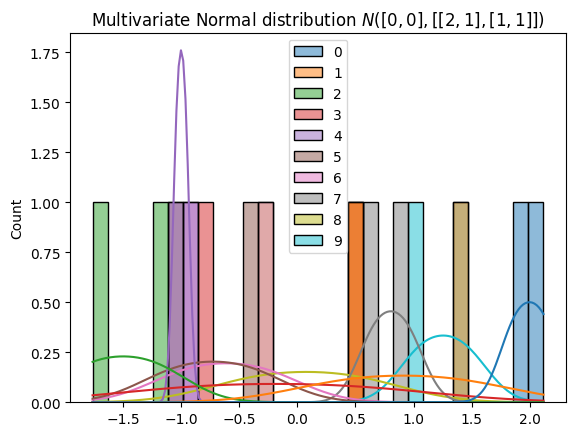

In [ ]:
x = multivariate_normal()
x[0:10]

#### **Simulación de una variable aleatoria del tipo t-Student multivariante $T_n$.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def t_student_multivariante(m=100, n=3, sigma=1, plot=True):
  def generate_x(m, sigma):
    return np.random.normal(0, sigma, m)

  def generate_y(n):
    return np.random.chisquare(n-1)

  def calculate_t(x, y, n):
    return x / y / n

  def plot_distribution(values):
    plt.hist(values, bins=20, density=True, alpha=0.7, color='g')
    plt.title('t-Student Multivariante')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.show()

  x_values = generate_x(m, sigma)
  y_value = generate_y(n)

  t_values = [calculate_t(x, y_value, n) for x in x_values]

  x_output = tuple(t_values)

  if plot == True:
    plot_distribution(x_output)

  return x_output

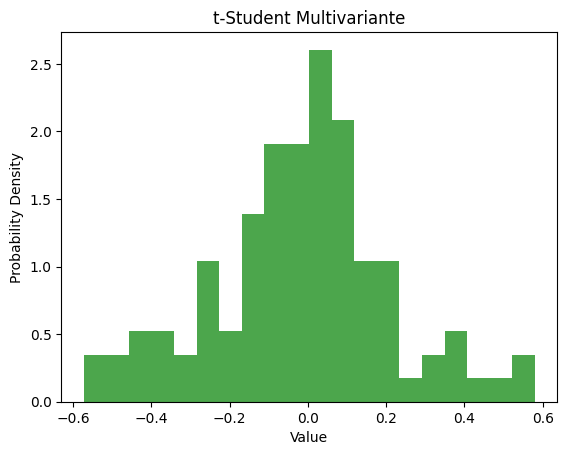

(-0.11949012921791118,
 -0.16371125379915247,
 0.06934812201130952,
 -0.48185841895834997,
 -0.06332389262932639,
 -0.5522248783614183,
 -0.030436377196753267,
 -0.10302668605640077,
 0.5543847024638927,
 0.00923253394962894)

In [ ]:
resultados= t_student_multivariante(plot=True)
resultados[0:10]